In [33]:
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/376.0 MB 10.1 MB/s eta 0:00:38
    --------------------------------------- 5.2/376.0 MB 13.9 MB/s eta 0:00:27
   - -------------------------------------- 9.4/376.0 MB 15.9 MB/s eta 0:00:24
   - -------------------------------------- 15.2/376.0 MB 18.8 MB/s eta 0:00:20
   -- ------------------------------------- 19.4/376.0 MB 18.9 MB/s eta 0:00:19
   -- ------------------------------------- 26.0/376.0 MB 21.1 MB/s eta 0:00:17
   --- ------------------------------------ 33.3/376.0 MB 23.0 MB/s eta 0:00:15
   ---- ----------------------------------- 39.8/376.0 MB 23.9 MB/s eta 0:00:15
   ---- ----------------------------------- 44.8/376.0 MB 24.0 MB/s eta 0:00:14
   ----- ---------------------------------- 51.4/376.0 MB 24.4 MB/s eta 0:00:14
   ------ --------------------------------- 58.2/376.0 MB 25.2 MB/s eta 0:00:13
   ------ --------------------------------- 64.5/376

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid, softmax

In [12]:
data = pd.read_csv('train-Copy1.csv')

In [13]:
data.shape

(42000, 785)

In [14]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data = data.to_numpy()

In [17]:
np.random.shuffle(data)

In [18]:
data

array([[2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
X = data[:, 1:]  
Y = data[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

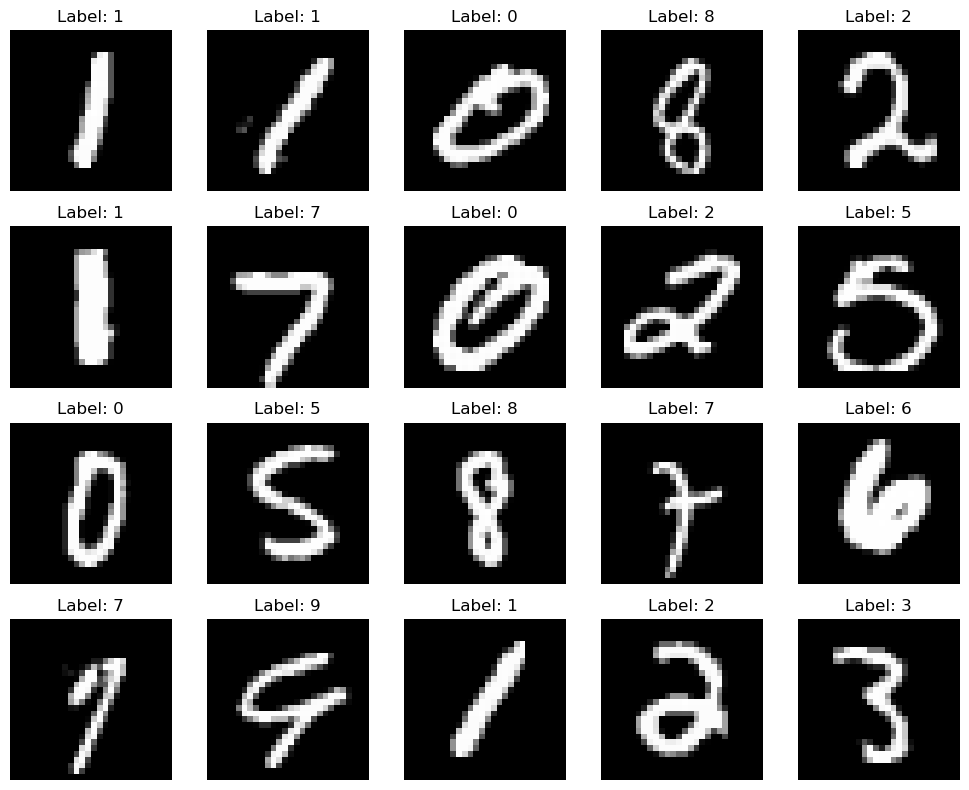

In [25]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flatten()):
    image_data = X_train[i]
    image_2d = image_data.reshape(28, 28)
    ax.imshow(image_2d, cmap='gray')
    ax.set_title(f"Label: {Y_train[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [28]:
X_train.shape

(33600, 784)

In [35]:
model = Sequential(
    [
        tf.keras.Input(shape = (784,)),
        Dense(25, activation = 'relu', name = 'L1'),
        Dense(10, activation = 'softmax', name = 'L2'),
    ], name = 'MyModel'
)
        

In [36]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
model.summary()

Model: "MyModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,885 (77.68 KB)

 Trainable params: 19,885 (77.68 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(
    X_train,Y_train,
    epochs=40
)

Epoch 1/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.3993 - loss: 3.7915 
Epoch 2/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.6559 - loss: 1.0798
Epoch 3/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.7633 - loss: 0.7920
Epoch 4/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.8016 - loss: 0.6448
Epoch 5/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.8301 - loss: 0.5456
Epoch 6/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.8522 - loss: 0.4869
Epoch 7/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.8723 - loss: 0.4312
Epoch 8/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.8840 - loss: 0.3975
Epoch 9/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.8988 - loss: 0.3494
Epoch 10/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.9054 - loss: 0.3322
Epoch 11/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.9130 - loss: 0.3138
Epoch 1

In [45]:
predictions_probabilities = model.predict(X_test)

predicted_labels = np.argmax(predictions_probabilities, axis=1)

print(f"Probability output for first image: {predictions_probabilities[0]}")
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"Actual label for first image: {Y_test[0]}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
Probability output for first image: [3.4521595e-21 1.0369980e-04 9.1392136e-01 8.5935205e-02 9.1914475e-24
 2.3988913e-11 4.1142372e-21 3.9782062e-05 1.0928820e-08 1.7049066e-28]
Predicted label for first image: 2
Actual label for first image: 2


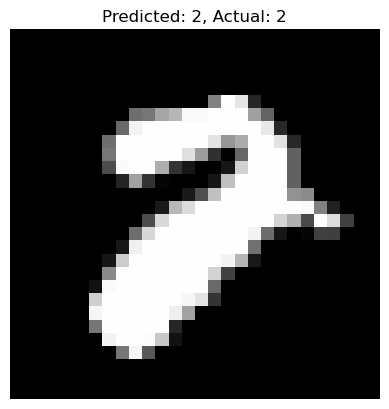

In [46]:
import matplotlib.pyplot as plt

image_index = 0
test_image = X_test[image_index]

predicted_label = predicted_labels[image_index]
actual_label = Y_test[image_index]

plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()

In [47]:
loss, accuracy = model.evaluate(X_test, Y_test)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.9193 - loss: 0.4800
Model Accuracy: 91.93%
